In [2]:
from scipy.fft import fft, ifft
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import subprocess
from IPython.display import HTML
from IPython import display
#import seaborn as sb

NLSE:

$$i\frac{\partial u}{\partial \xi}+\beta\frac{\partial^2 u}{\partial \tau^2}+\lambda|u|^2u=0$$

SE:

$$i\hbar\frac{\partial \Psi}{\partial t}=-\frac{\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2}+V(x)\Psi$$
$$i\frac{\partial \Psi}{\partial t}=-\frac{\hbar}{2m}\frac{\partial^2\Psi}{\partial x^2}+\frac{1}{\hbar}V(x)\Psi$$

$$\beta=\frac{\hbar}{2m}$$
$$\lambda=\frac{1}{\hbar}$$
$$i\frac{\partial \Psi}{\partial t}=-\beta\frac{\partial^2\Psi}{\partial x^2}+\lambda V(x)\Psi$$


$$\hat{L}\equiv\beta\frac{\partial^2 }{\partial x^2}; \hat{N}\equiv-\lambda V(x)$$
Reescribiendo en terminos de $L$ y $N$
$$\frac{\partial \Psi}{\partial t}=(i\hat{L}+i\hat{N})\Psi$$

$$\Psi(x,t)=e^{it(\hat{L}+\hat{N})}\Psi(x,0)$$

$$\Psi(x,t+dt)=e^{idt(\hat{L}+\hat{N})}\Psi(x,t)$$
$$\Psi(x,t+dt)=e^{idt\hat{L}}e^{i dt\hat{N}}\Psi(x,t)$$

APLICANDO TRANSOFRAMA DE DOURIER A LA parte lineal

$$\mathcal{F}\{\frac{\partial^n u}{\partial t^n}\}=(\omega i)^n \hat{u} \therefore$$

$$\mathcal{F}\{\hat{L}\Psi\}=\beta\frac{\partial^2 \hat{\Psi}}{\partial t^2}=\beta(\omega i)^2 \hat{\Psi}$$

Sustituyenbdo:

$$\hat{\Psi(x,t+dt)}=e^{idt(\beta(\omega i)^2)}\mathcal{F}\{e^{idt\hat{N}}\Psi(x,t)\}$$
$$\Psi(x,t+dt)=\mathcal{F}^{-1}\{e^{idt(\beta(\omega i)^2)}\mathcal{F}\{e^{idt\hat{N}}\Psi(x,t)\}\}$$



Condicion inicial
$$\Psi(x,0)=\sqrt{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}}e^{i k_0 x}$$

In [261]:

#Ld=T0**2/abs(Beta2) #Longitud de dispersion de la fibra optica
#zreal=10 #Distancia de propagacion en unidades reales
#z=zreal#Zistancia en unidades adimensionales


In [3]:
h=1/(2*np.pi)#
m=1
lam=1/h
Beta=h/(2*m)
k=1
w=np.sqrt(k/m)

# Potencial Armonico

In [750]:
def V(t,a,V0):
    Vi=((1/2)*(w**2)*m*t**2)
    Vi[-1]=10000
    Vi[0]=10000
    return Vi###derivada de tiempo 2

# Barrera de Potencial

In [126]:
def V(t,a,V0):
    Vi=np.zeros(len(t))
    #Vi[-1]=10000
    #Vi[0]=10000
    Vi[(t>-a) & (t <a)]=V0
    return Vi

In [127]:
def NL(u,lam,ts,a,V0):
    return -lam*V(ts,a,V0)#lam*abs(u)**2

In [128]:
def LL(n,N,L):
    dw=2*np.pi/L
    ws=np.arange(-N/2,(N/2),1)*dw
    wss=np.fft.fftshift(ws)
    return ((1j*wss)**n)

In [137]:
L

260

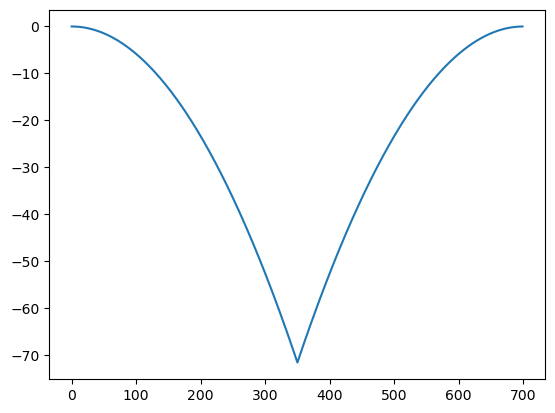

In [138]:
plt.plot(LL(2,N,L))

In [129]:
def tss(tf,xf,N):
    dt=tf/N
    #ts=np.arange(-tf,tf,dt)
    dx=(dt**2)/4
    xs=np.arange(0,xf,dx)
    #Nx=len(xs) #Numero de puntos espaciales
    if N%2==0:
        ts=np.arange(-N/2,(N/2),1)*dt
    T,X=np.meshgrid(ts,xs)
    return T,X,ts,xs

def step(aa,N,lam,Beta,xs,ts,u0,V0):
    a=aa/2
    Nx=len(xs)
    dt=np.diff(ts)[0]
    dx=np.diff(xs)[0]
    tf=ts[-1]
    xf=xs[-1]
############################Condiciones iniciales###################
    #u0=np.zeros(len(ts))
    #u0[int(N/2)+30]=1000000000000000000000000000000000
    #o=1
    #mu=-7.5
    #u0=np.sqrt(1/(o*np.sqrt(2*np.pi))*np.exp(-(1/2)*((ts-mu)/o)**2))*np.exp(1j*0.4*ts)
#########################Split Step##########################
    us=np.ones((Nx,N))*0j
    us[0,:]=u0
    us[:,0]=0
    us[:,-1]=0
    for i in range(0,Nx-1):
        us[i+1]=ifft(np.exp(1j*dx*LL(2,N,tf)*Beta)*fft(np.exp(1j*dx*NL(us[i],lam,ts,a,V0))*us[i]))
    return us,ts,Nx,xs
    

In [142]:
G/2

0.2

In [85]:
def p(u,ts):
     return np.trapz(abs(u)**2,ts)

## Derivada Diferencias finitas

In [86]:
def df(y,dt):
    yp=y*0
    n=len(y)
    for i in range(1,n-1):
        yp[i]=(y[i+1]+y[i-1])/(2*dt)
    yp[0]=yp[1]
    yp[-1]=yp[-2]
    return yp


In [87]:
#def M(u,ts):
 #   dt=np.diff(ts)[0]
  #  a=(df(np.conj(u),dt)*u-df(u,dt)*np.conj(u))
  #  return 1j*trapz(a,ts)

# Solucion Ecuacionde Shrodinger

In [130]:
L=2*130 ###distancia de x
N=700 ###Numero de putnos en t
z=2000#Limite de tiempo a simular

T,X,ts,xs=tss(L,z,N)
mu=-90
o=5
k0=0.9

#### condicion Inicial
Condicion inicial
$$\Psi(x,0)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}e^{i k_0 x}$$

In [131]:
u0=np.sqrt(1/(o*np.sqrt(2*np.pi))*np.exp(-(1/2)*((ts-mu)/o)**2))*np.exp(1j*k0*ts)

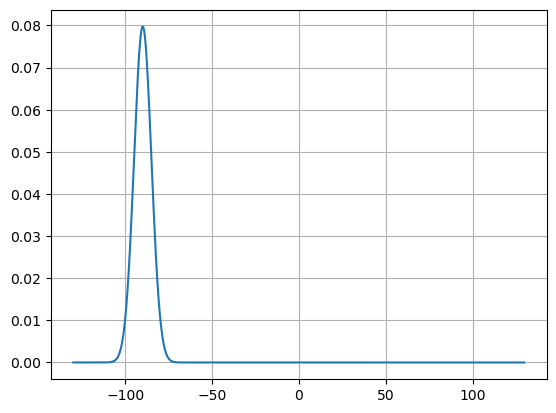

In [144]:
plt.plot(ts,np.abs(u0)**2)
p((u0),ts)#integral
plt.grid('on')
#plt.axis('equal')

In [147]:
us[0,:]

array([ 0.00000000e+000+0.00000000e+000j,
       -3.88948064e-008+1.76869017e-008j,
       -5.70290442e-008+5.29030588e-009j,
       -7.43341499e-008-1.83315279e-008j,
       -8.55897285e-008-5.55962964e-008j,
       -8.32350466e-008-1.07149883e-007j,
       -5.76327346e-008-1.70393530e-007j,
        1.93382616e-009-2.37803464e-007j,
        1.05275813e-007-2.95337546e-007j,
        2.58158237e-007-3.21402822e-007j,
        4.58020680e-007-2.87032932e-007j,
        6.88881936e-007-1.58046307e-007j,
        9.16172038e-007+1.00041424e-007j,
        1.08273711e-006+5.13771379e-007j,
        1.10776749e-006+1.09004693e-006j,
        8.90780452e-007+1.80166103e-006j,
        3.22873280e-007+2.57181919e-006j,
       -6.92950935e-007+3.26076992e-006j,
       -2.21168706e-006+3.65903289e-006j,
       -4.20769442e-006+3.49281787e-006j,
       -6.53152185e-006+2.44762349e-006j,
       -8.86958583e-006+2.15192855e-007j,
       -1.07176688e-005-3.43350196e-006j,
       -1.13821917e-005-8.55111503

In [148]:
V0=0.4### Haltura del potencial
G=0.4 ###Grosor de la pared
us,ts,Nx,xs=step(G,N,lam,Beta,xs,ts,u0,V0)

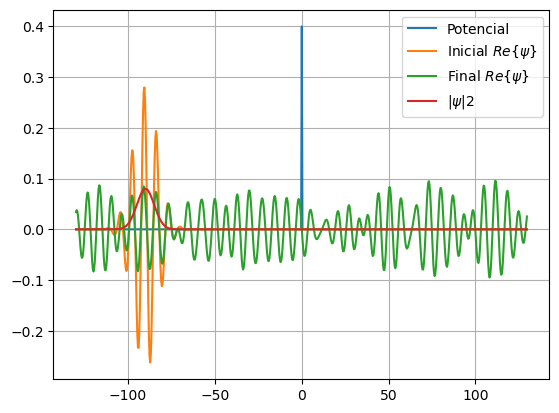

In [149]:
plt.plot(ts,V(ts,G/2,V0),label='Potencial')
plt.plot(ts,us[1],label='Inicial $Re\{\psi\}$')
plt.plot(ts,us[-1],label='Final $Re\{\psi\}$')
plt.plot(ts,np.abs(us[0])**2,label='$|\psi|2$')
plt.grid('on')
#plt.axis('equal')
plt.legend()

# Reduccion en puntos de graficacion

In [113]:
M=100##########tiempo
step1=Nx/M
pp=np.arange(0,Nx,1)
xx=pp[::int(step1)]

In [114]:
M1=200##########espacio
step2=N/M1
pp1=np.arange(0,N,1)
tt=pp1[::int(step2)]

# Animación

In [115]:
fig5 = plt.figure(figsize=(30,10))
cx = fig5.add_subplot(111)
plt.xlim(min(ts)-0.1,max(ts)+0.1)
plt.ylim(np.min(us[int(Nx/2):,:]-1),np.max(us[int(Nx/2):,:])+1)
def updatefi(i):
    cx.clear()
    plt.xlim(min(ts)-0.1,max(ts)+0.1)
    plt.ylim(np.min(us[int(Nx/2):,:]-1),np.max(us[int(Nx/2):,:])+1)
    #plt.axis('equal')
    plt.plot(ts[tt],V(ts[tt],G/2,V0),label='potencial $V(x)$')
    cx.plot(ts[tt],np.real(us[i,tt]),label='$Re\{\psi\}$',color='black')
    cx.plot(ts[tt],np.imag(us[i,tt]),label='$Im\{\psi\}$',color='red')
    cx.plot(ts[tt],np.abs(us[i,tt])**2,label='$|\psi|^2$',color='blue')
    plt.legend()
    return fig5

anim = FuncAnimation(fig5, updatefi, frames=xx,interval=24)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

C:\Users\Arif\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\matplotlib\transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
